In [1]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt

from Libraries.get_absolute_path import get_absolute_path

In [2]:
# Ouverture des métadonnées
df = pd.read_csv(r'CSV\metadatas_with_url.csv')

# Etape 1 - Augmenter un masque

([], [])

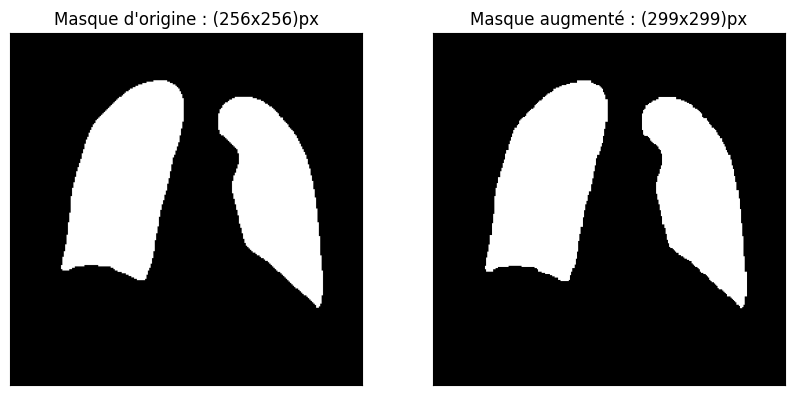

In [3]:
mask = cv2.imread(get_absolute_path(df.loc[0, "MASK_URL"]), cv2.IMREAD_GRAYSCALE)

# Dans notre cas, la méthode d'interpolation la plus adaptée pour augmenter l'image semble être une interpolation nearest car elle ne va pas créer de
# valeur intermédiare entre 0 et 255, ce qui pourrait introduire des biais dans le modèle en fusionant avec les images d'origine
mask_resized = cv2.resize(mask, dsize=(299,299), interpolation=cv2.INTER_NEAREST)

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(mask, cmap='gray')
plt.title(f"Masque d'origine : ({mask.shape[0]}x{mask.shape[1]})px")
plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.imshow(mask_resized, cmap='gray')
plt.title(f"Masque augmenté : ({mask_resized.shape[0]}x{mask_resized.shape[1]})px")
plt.xticks([])
plt.yticks([])

# Etape 2 - Augmenter tout les masques et les stocker

In [4]:
import os
from pathlib import Path

def save_img(img : cv2.imread, file_name : str, path : str):
    # Fonction qui enregistre une image à l'endroit spécifié, avec le nom file_name
    path = get_absolute_path(path)
    try :
        initial_dir = Path(__file__).resolve().parent # __file__ is accessible in .py files but not in .ipynb files
    except NameError:
        initial_dir = Path(os.getcwd()).resolve() # for .ipynb files
    os.chdir(path)
    cv2.imwrite(file_name, img)
    initial_dir = get_absolute_path(initial_dir)
    os.chdir(initial_dir)

In [6]:
# Parcours de tous les masques, augmentation en 299x299 puis enregistrement des nouveaux masques augmentés
for mask_url, file_name, label in zip(df["MASK_URL"], df['FILE NAME'], df['LABEL']):
    mask_url = get_absolute_path(mask_url) # get absolute path
    mask = cv2.imread(mask_url, cv2.IMREAD_GRAYSCALE)
    mask_resized = cv2.resize(mask, dsize=(299,299), interpolation=cv2.INTER_NEAREST)
    file_name = file_name + '.png'
    path = Path("data", "processed", label, "masks")
    path = get_absolute_path(path)
    save_img(mask_resized, file_name, path)

In [8]:
# Enregistrement des chemins d'accès dans les métadonnées
for file, format, label in zip(df['FILE NAME'], df['FORMAT'], df['LABEL']):
        format = format.lower() # set format in lowercase
        file_name = file + '.' + format # concatenate file and format to make global file_name
        path = Path("data", "processed", label, 'masks', file_name) # build Path from the variables in the current line of dataset
        df.loc[(df['FILE NAME'] == file), 'MASK_RESIZED_URL'] = path # update the path in DataFrame


In [9]:
df.head()

,FILE NAME,FORMAT,SIZE,URL,LABEL,IMG_URL,MASK_URL,MASK_RESIZED_URL
0,COVID-1,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,COVID,data\raw\COVID\images\COVID-1.png,data\raw\COVID\masks\COVID-1.png,data\processed\COVID\masks\COVID-1.png
1,COVID-2,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,COVID,data\raw\COVID\images\COVID-2.png,data\raw\COVID\masks\COVID-2.png,data\processed\COVID\masks\COVID-2.png
2,COVID-3,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,COVID,data\raw\COVID\images\COVID-3.png,data\raw\COVID\masks\COVID-3.png,data\processed\COVID\masks\COVID-3.png
3,COVID-4,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,COVID,data\raw\COVID\images\COVID-4.png,data\raw\COVID\masks\COVID-4.png,data\processed\COVID\masks\COVID-4.png
4,COVID-5,PNG,256*256,https://sirm.org/category/senza-categoria/covi...,COVID,data\raw\COVID\images\COVID-5.png,data\raw\COVID\masks\COVID-5.png,data\processed\COVID\masks\COVID-5.png


In [10]:
# Enregistrement des métadonnées avec les liens des masques augmentés
df.to_csv(r'..\..\data\processed\metadatas_with_url.csv', sep=',', encoding='utf-8', index=False, header=True)